# DEFINING THE QUESTION

### a) Specifying the Question

This week's project requires us to implement a K-nearest neighbor (kNN) classifier and calculate the resulting metrics: We will be trying to Determine the Survivors using the features in the dataset

---


## b) Defining the Metric for Success

Being able to accurately predict survivors from the test set.

---

## c) Understanding the context

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster. Titanic has inspired countless books, articles and films (including the 1997 “Titanic” movie starring Kate Winslet and Leonardo DiCaprio), and the ships story has entered the public consciousness as a cautionary tale about the perils of human hubris.

---

## d) Experimental Design

1. Read and explore the given datasets.
2. Find and deal with outliers, anomalies, and missing data within the dataset.
3. Perform univariate and bivariate analysis recording your observations.
4. Perform Exploratory Data Analysis.
5. Perforn KNN On Train Set
6. Challenge your solution by providing insights on how you can make improvements in model improvement.
7. Predictions on Test Set with best model.
8. Provide a recommendation based on your analysis. 
 
---

# DATA PREPARATION

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

%matplotlib inline

from sklearn import preprocessing

train = pd.read_csv('/content/train_week_9.csv')
test = pd.read_csv('/content/test _week_9.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape, test.shape

((891, 12), (418, 11))

In [ ]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

# DATA CLEANING

## Numerical Columns

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_numeric = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']
test_numeric = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']

print('Train Set: \n')
for i, col_val in enumerate(train_numeric):
  print(col_val, train[col_val].isnull().sum())

print('\n')
print('Test Set: \n')
for i, col_val in enumerate(test_numeric):
  print(col_val, test[col_val].isnull().sum())

# We can see that the age columns have a lot of missing values, and only 1 fare value 
# is missing in the test set.

Train Set: 

PassengerId 0
Survived 0
Pclass 0
Age 177
SibSp 0
Parch 0
Fare 0


Test Set: 

PassengerId 0
Pclass 0
Age 86
SibSp 0
Parch 0
Fare 1


In [ ]:
age_train = (177/train.shape[0]) * 100
age_test = (86/test.shape[0]) * 100
fare_test = (1/test.shape[0]) * 100
print(age_train, age_test, fare_test)

# We can comfortably drop that missing fare row on the test dataset,
# However, we have to deal with the missing age values.

19.865319865319865 20.574162679425836 0.23923444976076555


In [ ]:
train.Age.mean(), train.Age.median(), train.Age.mode()

# Since the age group is within a similar range for all central tendancy measures,
# We can use any of them to fill in the missing data.

(29.69911764705882, 28.0, 0    24.0
 dtype: float64)

In [ ]:
test.Age.mean(), test.Age.median(), test.Age.mode()

# Although a little more varied, the age group is that of the young adults:
# A young adult is generally a person ranging in age from their early twenties to their thirties
# Since it's the same age-group as the train set, and the train set has more data, we'll use 
# the same metric we used for the train set.

(30.272590361445783, 27.0, 0    21.0
 1    24.0
 dtype: float64)

In [ ]:
# We decided to use the modes

train['Age'] = train['Age'].fillna(24)
test['Age'] = test['Age'].fillna(21)

print('Train Set: \n')
for i, col_val in enumerate(train_numeric):
  print(col_val, train[col_val].isnull().sum())

print('\n')
print('Test Set: \n')
for i, col_val in enumerate(test_numeric):
  print(col_val, test[col_val].isnull().sum())

# Next we'll get rid of the missing Fare value.

Train Set: 

PassengerId 0
Survived 0
Pclass 0
Age 0
SibSp 0
Parch 0
Fare 0


Test Set: 

PassengerId 0
Pclass 0
Age 0
SibSp 0
Parch 0
Fare 1


In [ ]:
test = test[~(test.Fare.isna())]
test.Fare.isna().sum()

0

## Non-Numeric Columns

In [ ]:
train.info()

# We'll not use the Name and Ticket columns, since they are each unique in our analysis, so we can focus on 
# Sex, Cabin and Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

# We'll not use the Name and Ticket columns, since they are each unique in our analysis, so we can focus on 
# Sex, Cabin and Embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.1+ KB


In [ ]:
train.drop(columns=['Name','Ticket'], inplace= True)
test.drop(columns=['Name','Ticket'], inplace= True)

In [ ]:
train = train.fillna('unknown')
train[train == 'unknown'].count()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_cabin_unknown = (687 / train.shape[0]) * 100
train_embarked_unknown = (2/train.shape[0]) * 100

train_cabin_unknown, train_embarked_unknown

# There are too many unknowns in the Cabin column so we'll have to drop this column.
# For the Embarked column, we'll only drop the 2 rows with null values.

(77.10437710437711, 0.22446689113355783)

In [ ]:
test = test.fillna('unknown')
test[test == 'unknown'].count()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          326
Embarked         0
dtype: int64

In [ ]:
test_cabin_unknown = (326 / train.shape[0]) * 100
test_cabin_unknown

# The values missing are also a lot so we'll have to drop the cabin column in the 
# test dataset as well. This is justified since our training data will not include 
# this column as well.

36.58810325476992

In [ ]:
train.drop(columns=['Cabin'], inplace= True)
test.drop(columns=['Cabin'], inplace= True)

In [ ]:
train = train[train.Embarked != 'unknown']

The Dataset is now relatively clean

# DATA ANALYSIS

## UNIVARIATE ANALYSIS

### a) Train Dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


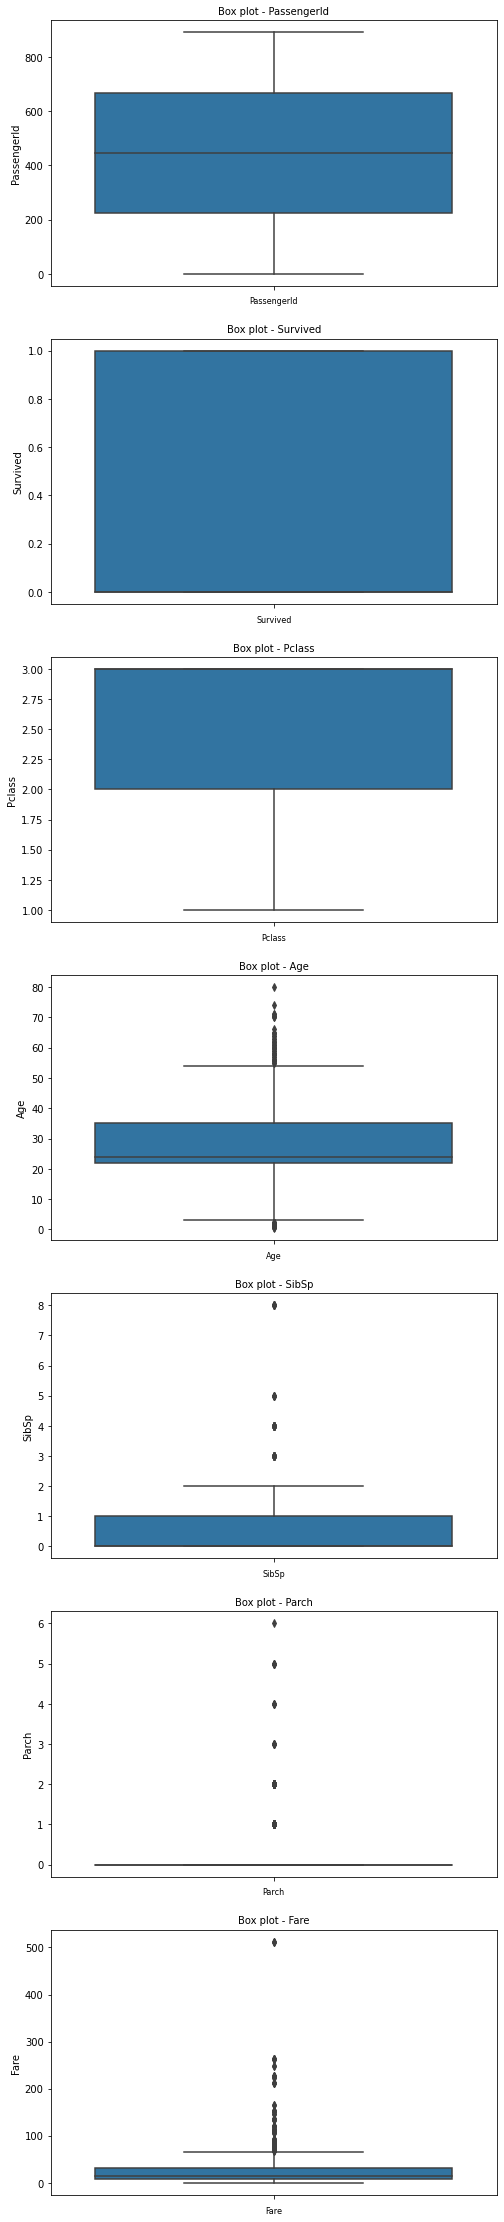

In [ ]:
# We'll analyze the Numerical columns

train_numeric = ['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']

fig, ax = plt.subplots(len(train_numeric), figsize= (8,40))

for i, col_val in enumerate(train_numeric):
  sns.boxplot(y = train[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# We can see that apart from PassengerId, Survived and Pclass, all the other numeric
# columns have outliers.

In [ ]:
Quantile_1 = train.quantile(.25)
Quantile_3 = train.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((train < Quantile_1 - 1.5* IQR_values) | (train > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

Age             65
Embarked         0
Fare           114
Parch          213
PassengerId      0
Pclass           0
Sex              0
SibSp           46
Survived         0
dtype: int64

In [ ]:
percent_anomalies = (anomalies.sum() / train.shape[0])*100
percent_anomalies

49.26884139482565

The outliers seem like reasonable data that cannot be removed as this would affect the analysis, since the rows involved are roughly 49% of the data.

---

### b) Test Dataset

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


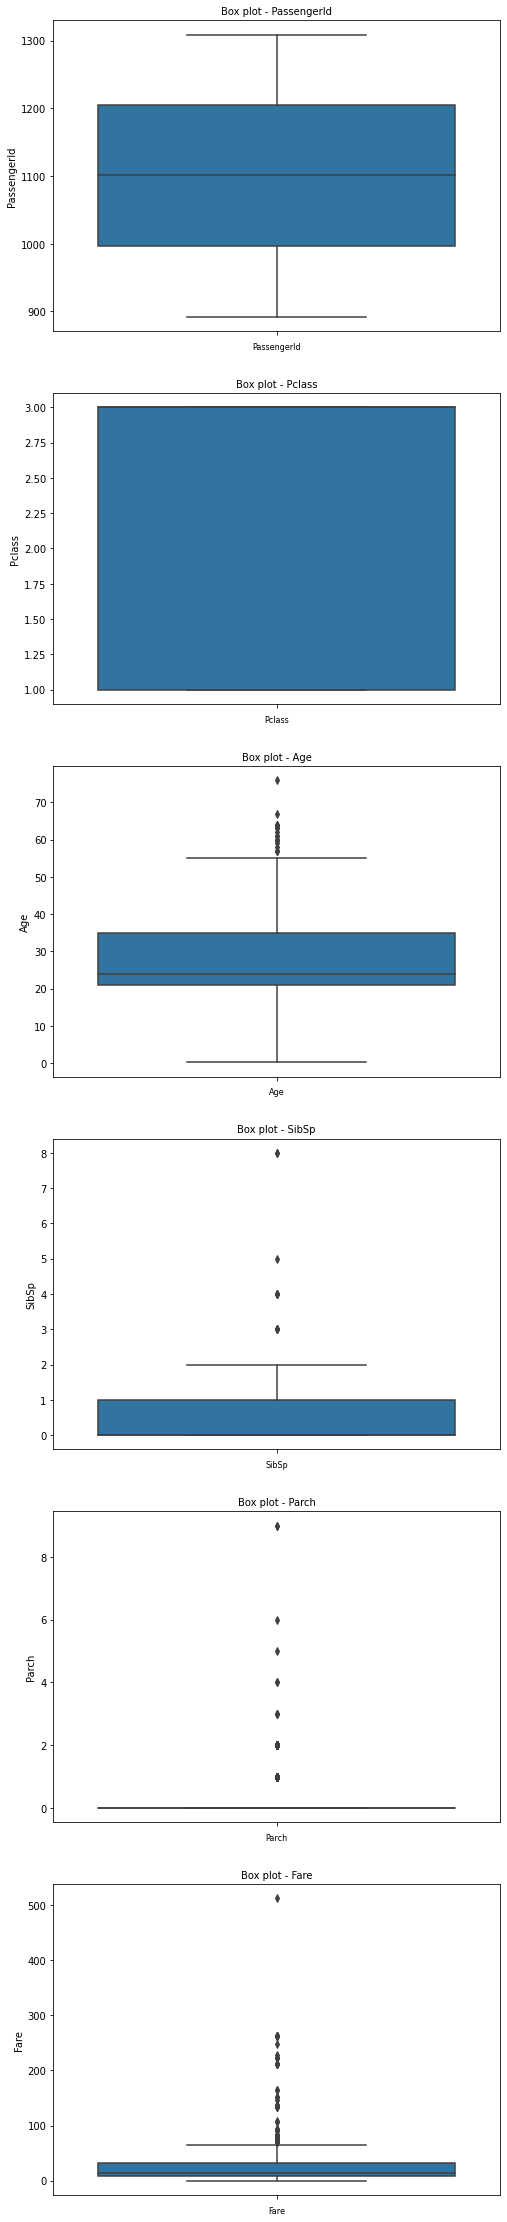

In [ ]:
test_numeric = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']

fig, ax = plt.subplots(len(test_numeric), figsize= (8,40))

for i, col_val in enumerate(test_numeric):
  sns.boxplot(y = test[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

# We can see that apart from PassengerId and Pclass, all the other numeric
# columns have outliers.

In [ ]:
Quantile_1 = test.quantile(.25)
Quantile_3 = test.quantile(.75)
IQR_values = Quantile_3 - Quantile_1

anomalies = ((test < Quantile_1 - 1.5* IQR_values) | (test > Quantile_3 + 1.5 * IQR_values)).sum()
anomalies

Age            18
Embarked        0
Fare           55
Parch          94
PassengerId     0
Pclass          0
Sex             0
SibSp          11
dtype: int64

In [ ]:
percent_anomalies = (anomalies.sum() / test.shape[0])*100
percent_anomalies

42.68585131894484

The outliers seem like reasonable data that cannot be removed as this would affect the analysis, since the rows involved are roughly 42% of the data.

---

### c) Univariate Analysis Recommendation

The anomalies look like reasonable data that could be due to some skewness in the data. This will further be investigated in the Bivariate Analysis amd Summary statistics sections.

---

## BIVARIATE ANALYSIS

### a) Train Dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


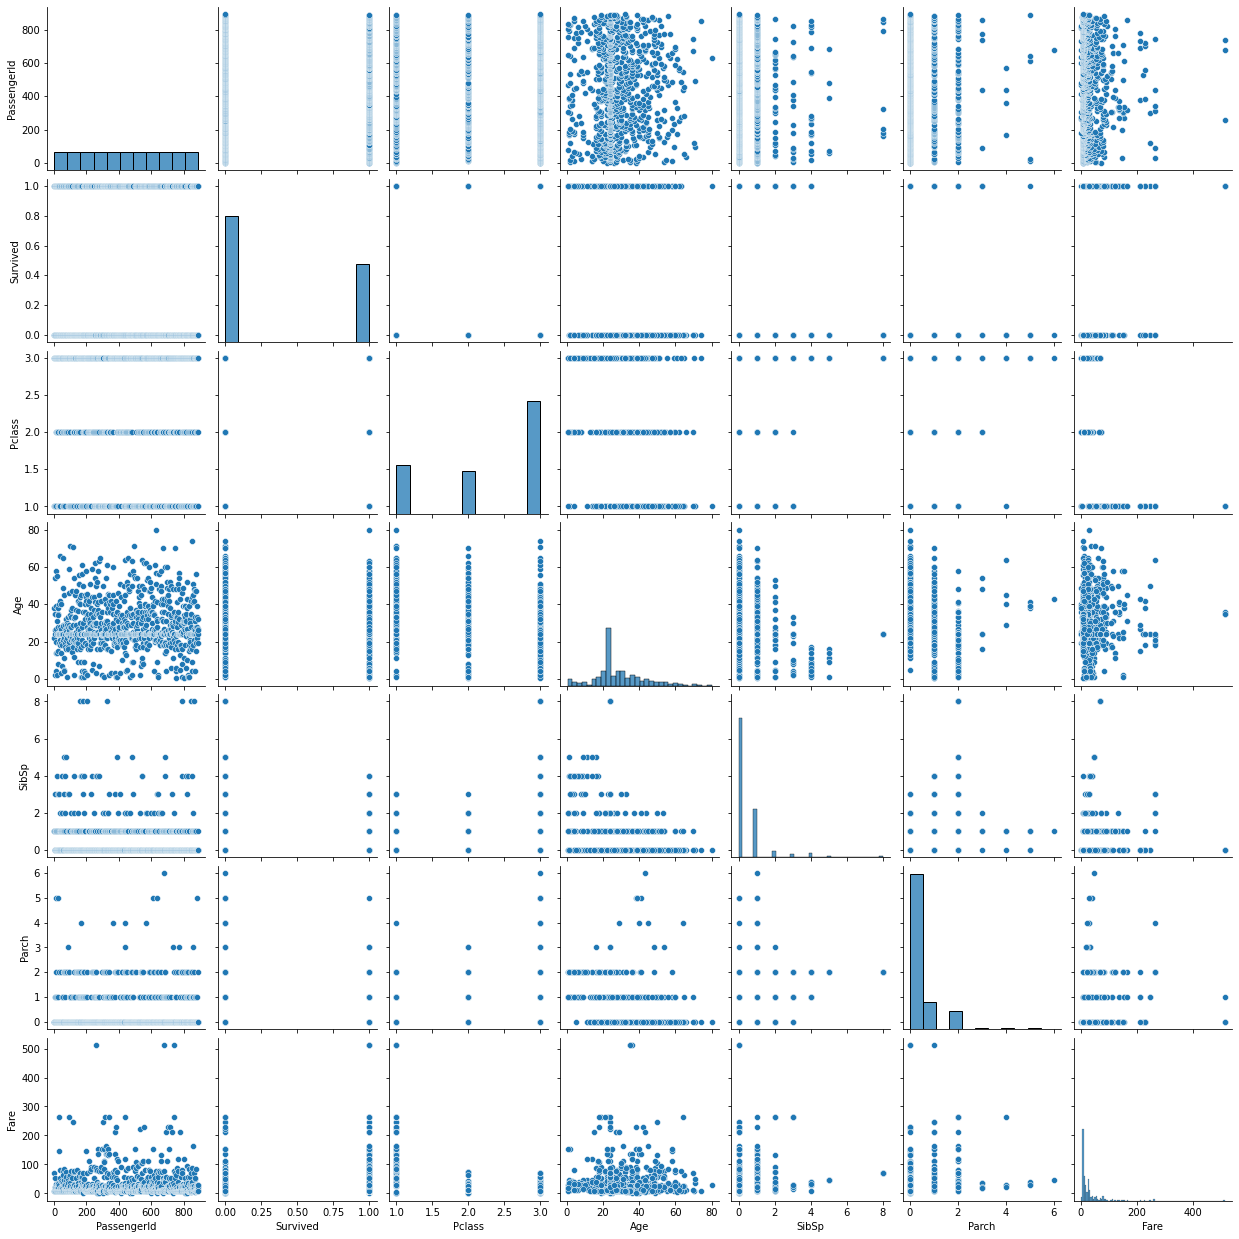

In [ ]:
sns.pairplot(train)

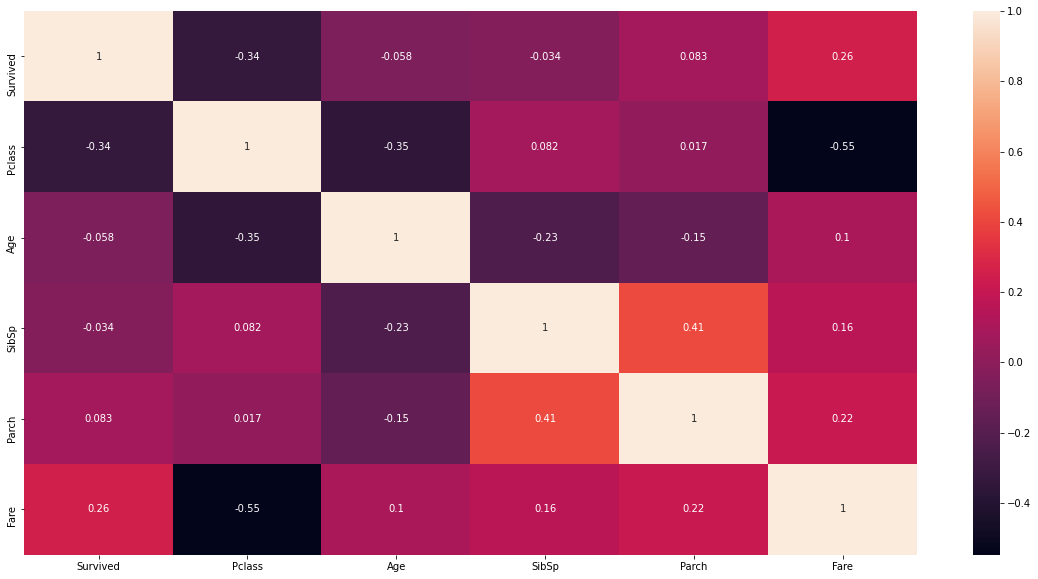

In [ ]:
# PassengerId is a unique identifier that can be dropped

train = train.drop(columns= ['PassengerId'])

plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot= True)

We can see that there are no variables that are highly correlated.

---

### b) Test Dataset

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Sex          417 non-null    object 
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 29.3+ KB


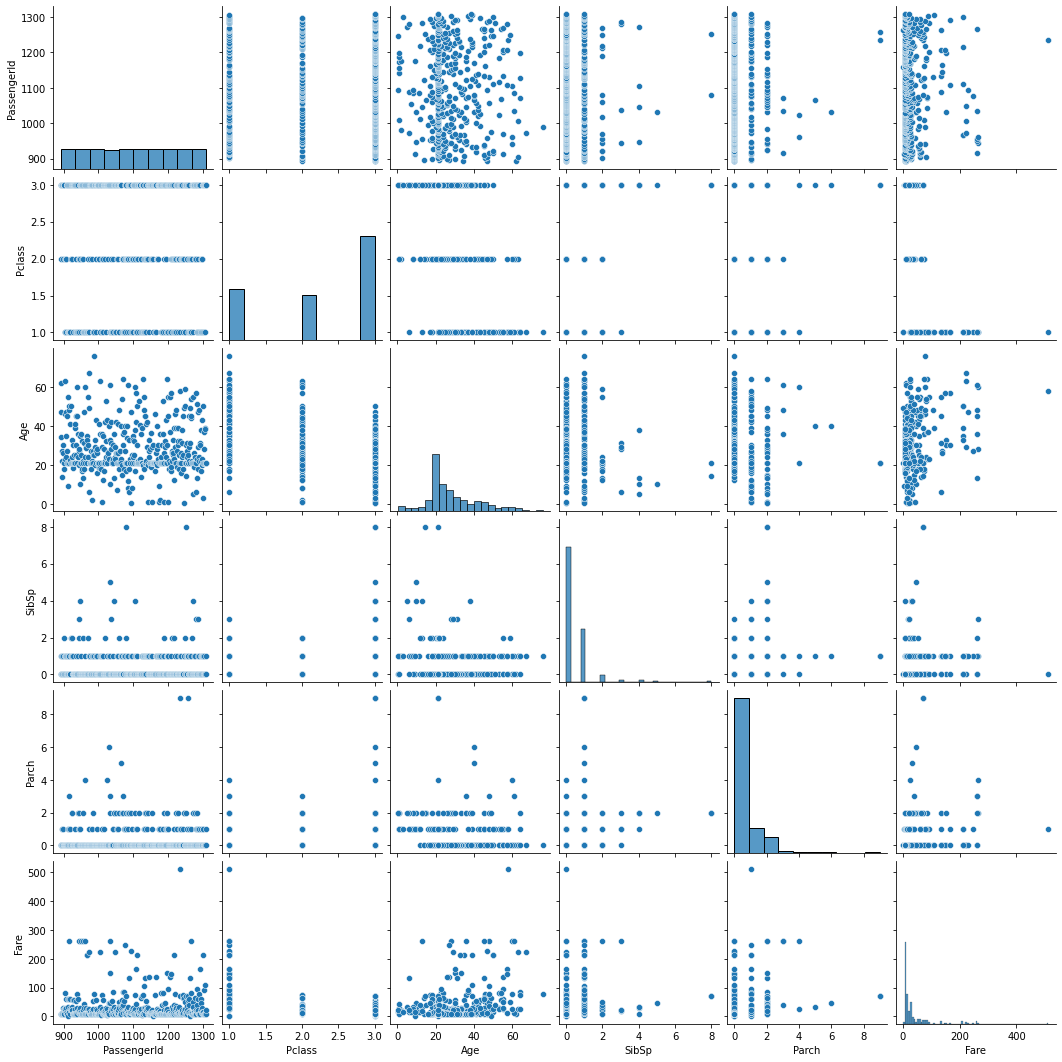

In [ ]:
sns.pairplot(test)

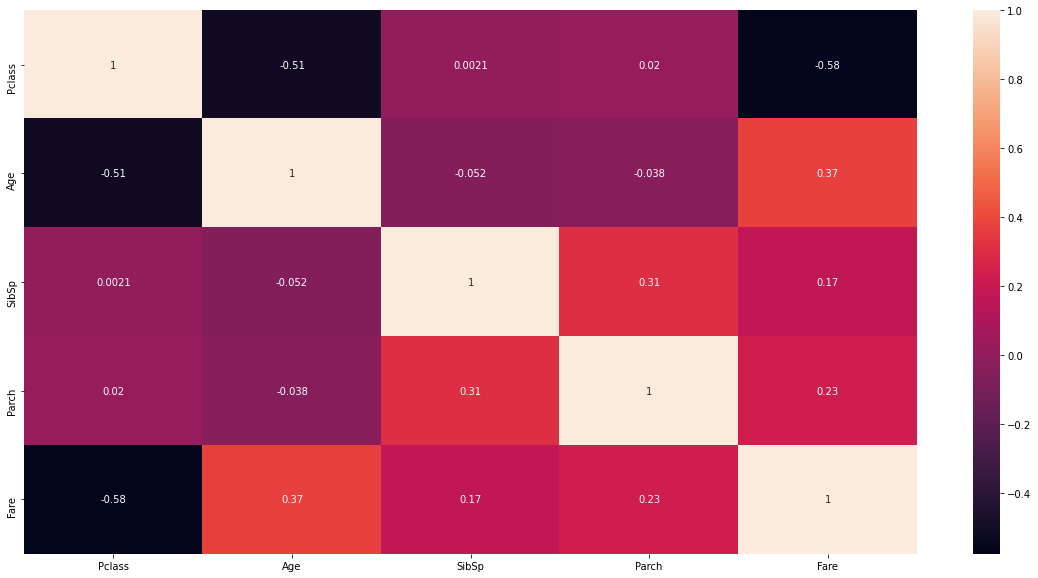

In [ ]:
# PassengerId is a unique identifier that can be dropped

test = test.drop(columns= ['PassengerId'])

plt.figure(figsize=(20,10))
sns.heatmap(test.corr(), annot= True)

We can see that there are no variables that are highly correlated.

----

### c) Bivariate Analysis Recommendation

The lack of highly correlated variables indicates poor multicolinearity among the variables, which will be good when it comes to machine learning modeling.

---

## SUMMARY STATISTICS

### a) Train Dataset

In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,28.518751,0.524184,0.382452,32.096681
std,0.486260,0.834700,13.162820,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Central Tendancies

# mean

train_numeric = ['Survived','Pclass','Age','SibSp','Parch','Fare']

for i, col_val in enumerate(train_numeric):
  print('The mean of ' + str(col_val) + ' is ' + str(train[col_val].mean()))

The mean of Survived is 0.38245219347581555
The mean of Pclass is 2.3115860517435323
The mean of Age is 28.518751406074237
The mean of SibSp is 0.5241844769403825
The mean of Parch is 0.38245219347581555
The mean of Fare is 32.09668087739029


In [ ]:
# median

for i, col_val in enumerate(train_numeric):
  print('The median of ' + str(col_val) + ' is ' + str(train[col_val].median()))

The median of Survived is 0.0
The median of Pclass is 3.0
The median of Age is 24.0
The median of SibSp is 0.0
The median of Parch is 0.0
The median of Fare is 14.4542


In [ ]:
# mode

for i, col_val in enumerate(train_numeric):
  print('The mode of ' + str(col_val) + ' is ' + str(train[col_val].mode()))

# The modes are unimodal showing that the data was gathered from the same population.

The mode of Survived is 0    0
dtype: int64
The mode of Pclass is 0    3
dtype: int64
The mode of Age is 0    24.0
dtype: float64
The mode of SibSp is 0    0
dtype: int64
The mode of Parch is 0    0
dtype: int64
The mode of Fare is 0    8.05
dtype: float64


In [ ]:
# range

for i, col_val in enumerate(train_numeric):
  print('The range of ' + str(col_val) + ' is ' + str(train[col_val].max()-train[col_val].min()))

The range of Survived is 1
The range of Pclass is 2
The range of Age is 79.58
The range of SibSp is 8
The range of Parch is 6
The range of Fare is 512.3292


In [ ]:
# standard deviation

for i, col_val in enumerate(train_numeric):
  print('The deviation of ' + str(col_val) + ' is ' + str(train[col_val].std()))

# variables with higher range showcase higher standard deviation from the mean.

The deviation of Survived is 0.48625968831477473
The deviation of Pclass is 0.8346997785705771
The deviation of Age is 13.162819681789076
The deviation of SibSp is 1.1037048755969272
The deviation of Parch is 0.8067607445174743
The deviation of Fare is 49.69750431670801


In [ ]:
# variance

for i, col_val in enumerate(train_numeric):
  print('The variance of ' + str(col_val) + ' is ' + str(train[col_val].var()))

# As expected, variables with higher standard deviation, also have higher variance.

The variance of Survived is 0.23644848447998187
The variance of Pclass is 0.6967237203457705
The variance of Age is 173.25982197529387
The variance of SibSp is 1.2181644524164283
The variance of Parch is 0.6508628988943893
The variance of Fare is 2469.8419353092113


In [ ]:
# skewness

for i, col_val in enumerate(train_numeric):
  print('The skewness of ' + str(col_val) + ' is ' + str(train[col_val].skew()))

# Only Pclass has negative skewness.

The skewness of Survived is 0.4845676297760328
The skewness of Pclass is -0.6369977585999191
The skewness of Age is 0.6568795526083108
The skewness of SibSp is 3.6910576308362284
The skewness of Parch is 2.74516012611158
The skewness of Fare is 4.801440211044194


In [ ]:
# kurtosis

for i, col_val in enumerate(train_numeric):
  print('The kurtosis of ' + str(col_val) + ' is ' + str(train[col_val].kurt()))

# Only Survived and Pclass have negative kurtosis

The kurtosis of Survived is -1.7691794454365986
The kurtosis of Pclass is -1.2694374832322646
The kurtosis of Age is 0.9378623280106138
The kurtosis of SibSp is 17.838972378994782
The kurtosis of Parch is 9.750591705579096
The kurtosis of Fare is 33.508477269700144


Survived and Pclass are showcasing a plutokurptic tendency with left-skewed data.

---

### b) Test Dataset

In [ ]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000
mean,2.263789,28.287770,0.448441,0.393285,35.627188
std,0.842077,13.101325,0.897568,0.982419,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,24.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Central Tendancies

# mean

test_numeric = ['Pclass','Age','SibSp','Parch','Fare']

for i, col_val in enumerate(test_numeric):
  print('The mean of ' + str(col_val) + ' is ' + str(test[col_val].mean()))

The mean of Pclass is 2.26378896882494
The mean of Age is 28.287769784172664
The mean of SibSp is 0.44844124700239807
The mean of Parch is 0.3932853717026379
The mean of Fare is 35.6271884892086


In [ ]:
# median

for i, col_val in enumerate(test_numeric):
  print('The median of ' + str(col_val) + ' is ' + str(test[col_val].median()))

The median of Pclass is 3.0
The median of Age is 24.0
The median of SibSp is 0.0
The median of Parch is 0.0
The median of Fare is 14.4542


In [ ]:
# mode

for i, col_val in enumerate(test_numeric):
  print('The mode of ' + str(col_val) + ' is ' + str(test[col_val].mode()))

# The modes are unimodal showing that the data was gathered from the same population.

The mode of Pclass is 0    3
dtype: int64
The mode of Age is 0    21.0
dtype: float64
The mode of SibSp is 0    0
dtype: int64
The mode of Parch is 0    0
dtype: int64
The mode of Fare is 0    7.75
dtype: float64


In [ ]:
# range

for i, col_val in enumerate(test_numeric):
  print('The range of ' + str(col_val) + ' is ' + str(test[col_val].max()-test[col_val].min()))

The range of Pclass is 2
The range of Age is 75.83
The range of SibSp is 8
The range of Parch is 9
The range of Fare is 512.3292


In [ ]:
# standard deviation

for i, col_val in enumerate(test_numeric):
  print('The deviation of ' + str(col_val) + ' is ' + str(test[col_val].std()))

# variables with higher range showcase higher standard deviation from the mean.

The deviation of Pclass is 0.8420773498029137
The deviation of Age is 13.101325096837602
The deviation of SibSp is 0.8975681445237608
The deviation of Parch is 0.9824190109514219
The deviation of Fare is 55.90757617997383


In [ ]:
# variance

for i, col_val in enumerate(test_numeric):
  print('The variance of ' + str(col_val) + ' is ' + str(test[col_val].var()))

# As expected, variables with higher standard deviation, also have higher variance.

The variance of Pclass is 0.7090942630510987
The variance of Age is 171.6447192930268
The variance of SibSp is 0.8056285740638267
The variance of Parch is 0.9651471130787701
The variance of Fare is 3125.6570743195775


In [ ]:
# skewness

for i, col_val in enumerate(test_numeric):
  print('The skewness of ' + str(col_val) + ' is ' + str(test[col_val].skew()))

# Only Pclass has negative skewness.

The skewness of Pclass is -0.5303008835426499
The skewness of Age is 0.8178220000041562
The skewness of SibSp is 4.163818499218192
The skewness of Parch is 4.6488781746082335
The skewness of Fare is 3.6872133081121405


In [ ]:
# kurtosis

for i, col_val in enumerate(test_numeric):
  print('The kurtosis of ' + str(col_val) + ' is ' + str(test[col_val].kurt()))

# Only Pclass has negative kurtosis

The kurtosis of Pclass is -1.386510204262605
The kurtosis of Age is 0.7075463263318844
The kurtosis of SibSp is 26.443896368694073
The kurtosis of Parch is 31.339433496352815
The kurtosis of Fare is 17.921595257735987


Pclass is showcasing a plutokurptic tendency with left-skewed data.

---

### c) Summary Stats Recommendation

Most of the skewness of the data is positive, indicating a mostly positively skewed dataset on most variables. This means that most distributions have longer tails to the right i.e. right-skewed / leptokurtic. Same goes for kurtosis as The data has mostly positive kurtosis indicating that most variables distributions have heavier tails and taller peaks than the normal distribution.

---

## EXPLORATORY DATA ANALYSIS

### Train Dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


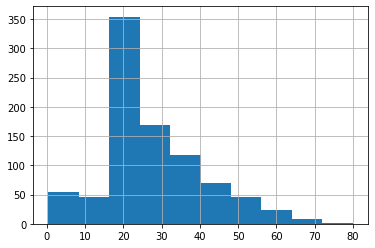

In [ ]:
train['Age'].hist(bins = 10)

# As expected, most of the people are between 20 and 30 years old

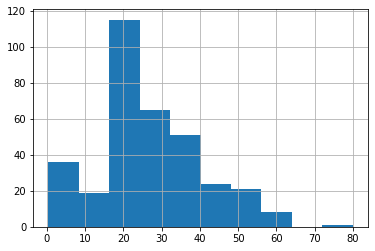

In [ ]:
train_survive = train[train.Survived == 1]

train_survive['Age'].hist(bins=10)

# Most of those who aurvived are also in the same age group.

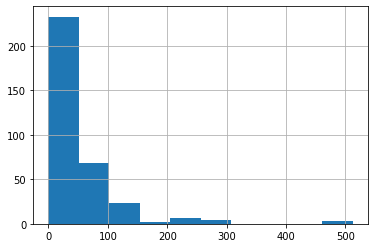

In [ ]:
train_survive['Fare'].hist(bins=10)

# Most of the survivors had paid a lower fee.

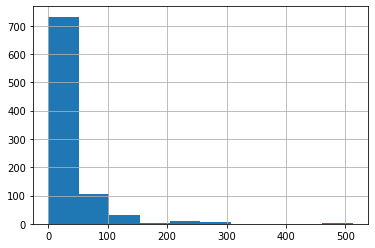

In [ ]:
train['Fare'].hist(bins = 10)

# However, in total there were a lot more people who paid the lower fares.

### Test Dataset

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


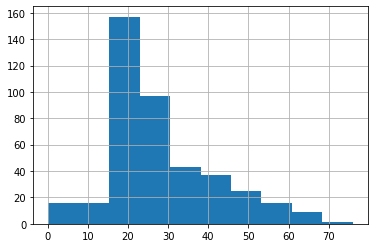

In [ ]:
test['Age'].hist(bins = 10)

# As expected, most of the people are between 20 and 30 years old

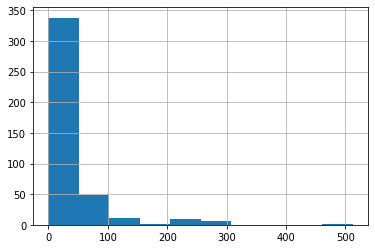

In [ ]:
test['Fare'].hist(bins = 10)

# Most of the people paid the lower fares.

# MODELING

## PREPARATION

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
le = preprocessing.LabelEncoder()
train.Sex = le.fit_transform(train.Sex)
train.Embarked = le.fit_transform(train.Embarked)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [ ]:
X = train.drop(columns=['Survived'])
y = train.Survived

## 80:20 Model Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
error = []

# Calculating error for K values between 1 and 20

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

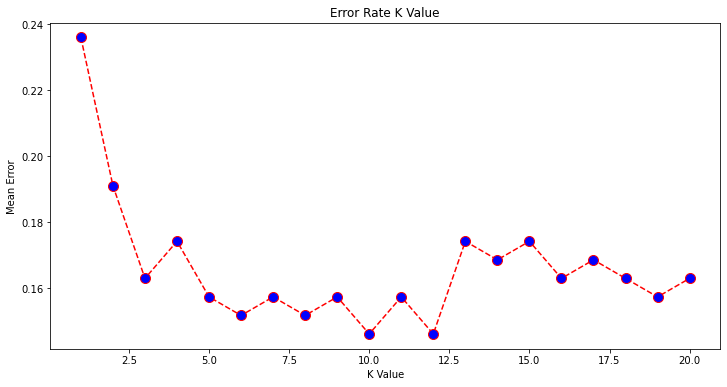

In [ ]:
# Plotting the above

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# From below we can see that the best K values are 10 and 12

In [ ]:
# using KNN of 10

clf = KNeighborsClassifier(n_neighbors= 10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107   8]
 [ 18  45]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       115
           1       0.85      0.71      0.78        63

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



In [ ]:
# using KNN of 12

clf = KNeighborsClassifier(n_neighbors= 12)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Results are similar to KNN of 10, therefore we can use either.

[[107   8]
 [ 18  45]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       115
           1       0.85      0.71      0.78        63

    accuracy                           0.85       178
   macro avg       0.85      0.82      0.83       178
weighted avg       0.85      0.85      0.85       178



## 70:30 Model Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
error = []

# Calculating error for K values between 1 and 20

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

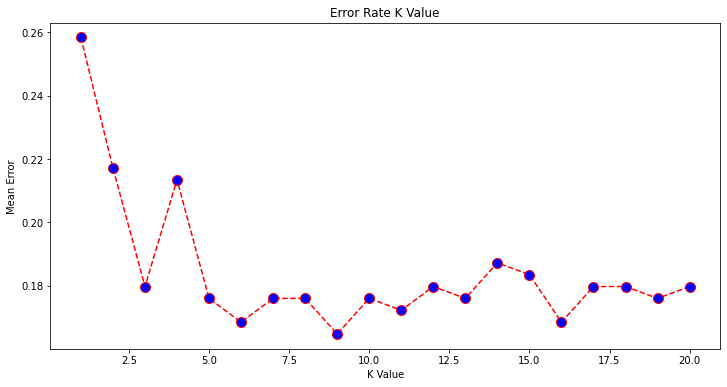

In [ ]:
# Plotting the above

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# From below we can see that the best K values is 9

In [ ]:
# using KNN of 9

clf = KNeighborsClassifier(n_neighbors= 9)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Results are worse than the 80:20 split.

[[153  16]
 [ 28  70]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.87       169
           1       0.81      0.71      0.76        98

    accuracy                           0.84       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.84      0.83       267



## 60:40 Model Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state= 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
error = []

# Calculating error for K values between 1 and 20

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

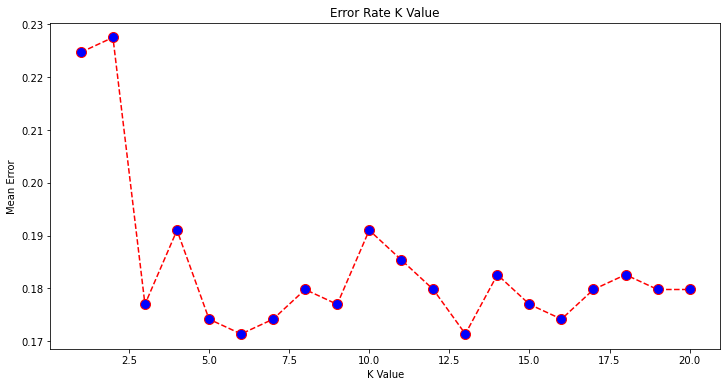

In [ ]:
# Plotting the above

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# From below we can see that the best K values are 6 and 13

In [ ]:
# using KNN of 6

clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[205  17]
 [ 44  90]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       222
           1       0.84      0.67      0.75       134

    accuracy                           0.83       356
   macro avg       0.83      0.80      0.81       356
weighted avg       0.83      0.83      0.82       356



In [ ]:
# using KNN of 13

clf = KNeighborsClassifier(n_neighbors= 13)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Results are the worst compared to the other splits.

[[204  18]
 [ 43  91]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       222
           1       0.83      0.68      0.75       134

    accuracy                           0.83       356
   macro avg       0.83      0.80      0.81       356
weighted avg       0.83      0.83      0.82       356



## OPTIMIZING 80:20 MODEL

The 80:20 Model Split had the highest Precision, Recall and F1 score values with either KNN k values of 10 or 12. This is the model that we will ooptimize before making the predictions on our test dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#List Hyperparameters that we want to tune.
n_neighbors = list(range(10,13))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
clf_2 = KNeighborsClassifier()

#Use GridSearch
clf_2 = GridSearchCV(clf_2, hyperparameters, cv=5)

#Fit the model
best_model = clf_2.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 12


In [ ]:
# Applying the above hyperparameters

optimized = KNeighborsClassifier(leaf_size=30,n_neighbors=12, p=1)
optimized.fit(X_train, y_train)

y_pred = optimized.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[107   8]
 [ 19  44]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       115
           1       0.85      0.70      0.77        63

    accuracy                           0.85       178
   macro avg       0.85      0.81      0.83       178
weighted avg       0.85      0.85      0.84       178



The Optimized Solution's performance is no better than the Original Model

# CONCLUSION

The precision informs us on the accuracy of the true positive predictions with regards to false positives. The recall informs us on the accuracy of the true positive predictions with regards to false negatives. The f1-score finds the best balance between precision and recall. For this challenge the best accuracy score to work with, in order to beat the accuracy paradox of the accuracy score is the f1-score. Using this, the 80:20 split Model is the best Model with KNN n_neighborhood values of either 10 or 12.

---

# CHALLENGING THE SOLUTION

In [ ]:
# To try improve the scores, we could try and improve the imbalance of the classes as
# indicated by the lower support values of class 1 in all models.

# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, 

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 549, 1: 340})
Resample dataset shape Counter({0: 549, 1: 549})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.20, random_state= 10)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
error = []

# Calculating error for K values between 1 and 20

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

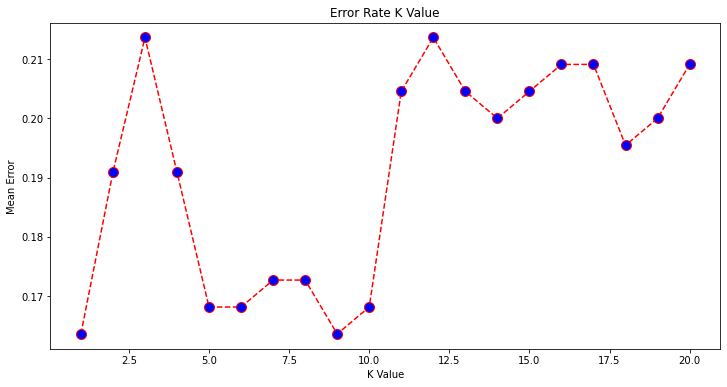

In [ ]:
# Plotting the above

plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# From below we can see that the best K values are 1 and 9

In [ ]:
#List Hyperparameters that we want to tune.
n_neighbors = list(range(1,10))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

#Create new KNN object
clf_3 = KNeighborsClassifier()

#Use GridSearch
clf_3 = GridSearchCV(clf_3, hyperparameters, cv=5)

#Fit the model
best_model = clf_3.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 1


In [ ]:
# Applying the above hyperparameters

challenge = KNeighborsClassifier(leaf_size=30,n_neighbors=1, p=1)
challenge.fit(X_train, y_train)

y_pred = challenge.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# This is the model with the best performance and we can use it to predict the test dataset

[[92 23]
 [11 94]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       115
           1       0.80      0.90      0.85       105

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [ ]:
test.Sex = le.fit_transform(test.Sex)
test.Embarked = le.fit_transform(test.Embarked)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int64  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


In [ ]:
predict_unknown = challenge.predict(test)
test['Survived'] = predict_unknown
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,0,7.8292,1,1
1,3,0,47.0,1,0,7.0000,2,0
2,2,1,62.0,0,0,9.6875,1,1
3,3,1,27.0,0,0,8.6625,2,1
4,3,0,22.0,1,1,12.2875,2,1


# RECOMMENDATION

The Precision and Recall values of our 'challenge the solution' model are the best and this led to better f1-score values indicating that 84% of the Non=Survivors predictions were right, whereas 85% of the Survivors predictions were right. This improvement was due to the improvement in class balance as shown by the support values. Other methods of class imbalance correction should be further researched to see if the results can be improved. We can also notice that as the train split decreases the accuracy scores decrease, indicating the more the data for training, the better the results will be.

---

# FOLLOW UP QUESTIONS

## a) Did we have the right data?

Yes, as our accuracy scores were all above 80%

## b) Do we need other data to answer our question?

Yes, if we had the survived column with the test dataset, we could have checked if our predictions were accurate or if they were fitted to fit the train set

## c) Did we have the right question?

Yes, because the tale of the titanic and it's survivors is so ingrained in pop culture and has even been made into one of the best selling films of all time. It's therefore a good dataset to learn with